In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [2]:
air_data = pd.read_csv("Invistico_Airline.csv")
air_data.head(6)

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   
5    satisfied    Male  Loyal Customer   30  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   
5             1894             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   
5               0  ...               2                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   
5                 5                 4                 5                5   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   
5            4                2                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  
5                       0.0  

[6 rows x 23 columns]

In [4]:
# Poistetaan rivit, joissa datan osalta puutteita
air_data_subset = air_data.dropna(axis=0)
air_data_subset.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [5]:
# Konvertoidaan kategoriset ominaisuudet one-hot encoded -ominaisuuksiksi
air_data_subset_dummies = pd.get_dummies(air_data_subset, columns=['Customer Type','Type of Travel','Class', "Gender"])
air_data_subset_dummies.head(6)

satisfaction  Age  Flight Distance  Seat comfort  \
0    satisfied   65              265             0   
1    satisfied   47             2464             0   
2    satisfied   15             2138             0   
3    satisfied   60              623             0   
4    satisfied   70              354             0   
5    satisfied   30             1894             0   

   Departure/Arrival time convenient  Food and drink  Gate location  \
0                                  0               0              2   
1                                  0               0              3   
2                                  0               0              3   
3                                  0               0              3   
4                                  0               0              3   
5                                  0               0              3   

   Inflight wifi service  Inflight entertainment  Online support  ...  \
0                      2                       4               2  ...   
1                      0                       2               2  ...   
2                      2                       0               2  ...   
3                      3                       4               3  ...   
4                      4                       3               4  ...   
5                      2                       0               2  ...   

   Arrival Delay in Minutes  Customer Type_Loyal Customer  \
0                       0.0                          True   
1                     305.0                          True   
2                       0.0                          True   
3                       0.0                          True   
4                       0.0                          True   
5                       0.0                          True   

   Customer Type_disloyal Customer  Type of Travel_Business travel  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   
5                            False                           False   

   Type of Travel_Personal Travel  Class_Business  Class_Eco  Class_Eco Plus  \
0                            True           False       True           False   
1                            True            True      False           False   
2                            True           False       True           False   
3                            True           False       True           False   
4                            True           False       True           False   
5                            True           False       True           False   

   Gender_Female  Gender_Male  
0           True        False  
1          False         True  
2           True        False  
3           True        False  
4           True        False  
5          False         True  

[6 rows x 28 columns]

In [6]:
air_data_subset_dummies.dtypes

satisfaction                          object
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_Loyal Customer            bool
Customer Type_disloyal Customer         bool
Type of Travel_Business travel          bool
Type of Tr

In [7]:
# Irrotetaan datasta Y ja X.
Y = air_data_subset_dummies["satisfaction"]
X = air_data_subset_dummies.drop("satisfaction", axis=1)

In [9]:
# Erottellaan oppimista varten train-data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Validointi-dataa vielä erilleen
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

In [10]:
cv_params = {
    'n_estimators' : [50,100], 
    'max_depth' : [10,50],        
    'min_samples_leaf' : [0.5,1], 
    'min_samples_split' : [0.001, 0.01],
    'max_features' : ["sqrt"], 
    'max_samples' : [.5,.9]
}

In [11]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [13]:
# Alustetaan koneoppimismalli
rfc = RandomForestClassifier(random_state=0)

In [14]:
# Suoritetaan GridSearch parametreilla
rfc_val = GridSearchCV(rfc, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [15]:
# Aloitetaan mallin opettaminen
rfc_val.fit(X_train, Y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [16]:
# Tulostetaan ulos parhaat parametrit
rfc_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [17]:
# Luodaan uusi RandomForestClassifier, tällä kertaa optimaalisilla parametreillä
rfc_fit = RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_leaf=1, min_samples_split=0.001, max_features="sqrt", max_samples=0.9, random_state=0)

In [18]:
# Opetetaan malli uudelleen optimaaleilla parametreillä
rfc_fit.fit(X_train, Y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       random_state=0)

In [19]:
# Testataan mallin luotettavus
Y_pred = rfc_fit.predict(X_test)

pc_test = precision_score(Y_test, Y_pred, pos_label="satisfied")
print(f"The precision score is {pc_test}")

rc_test = recall_score(Y_test, Y_pred, pos_label="satisfied")
print(f"The recall score is {rc_test}")

ac_test = accuracy_score(Y_test, Y_pred)
print(f"The accuracy score is {ac_test}")

f1_test = f1_score(Y_test, Y_pred, pos_label="satisfied")
print(f"The F1 score is {f1_test}")

The precision score is 0.9518568687210747
The recall score is 0.9512126339537507
The accuracy score is 0.9469294451995551
The F1 score is 0.9515346422929362


Text(0.5, 1.0, 'Variable Importances')

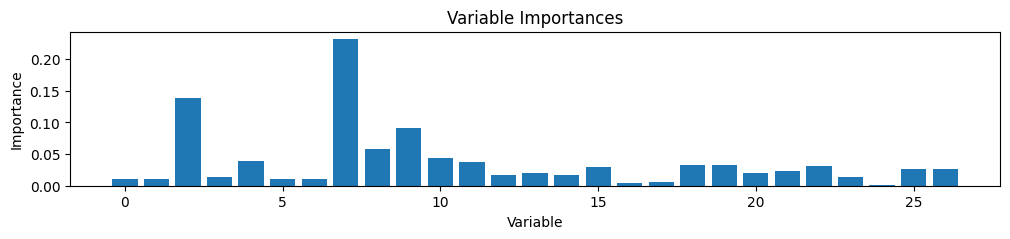

In [20]:
importances = list(rfc_fit.feature_importances_)

X_values = list(range(len(importances)))

plt.figure(figsize=(12, 2))
plt.bar(X_values, importances)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [21]:
# Katsotaan kuvaajasta eniten merkitsevä muuttuja (7)
air_data.columns[7]

'Seat comfort'

In [22]:
# Toiseksi isoin vaikutus oli muuttujalla 2
air_data.columns[2]

'Customer Type'